In [ ]:
# install needed packages (only needed once)
%pip install numpy matplotlib pyyaml pathlib tqdm numba

## Gillespie Simulation 

### Example

#### Define System

In [2]:
# Import own packages
from Gillespie_Example import *
import numpy as np

# Plot inside Jupyter Notebook
%matplotlib inline

# auto reload imports after changes
%load_ext autoreload
%autoreload 2

# Set the random number seed for reproducibility
np.random.seed(1)

# Set initial conditions
T = 0 # for completeness
N_A = 10
N_B = 30
N_AB = 0

# Set reaction rates 
rf = 0.1        # Forward reaction rate
rb = 1.0        # Backwards reaction rate

# Set meta-parameters
steps = 100          # Number of reactions per trajectory
trajectories = 100  # Number of trajectories to simulate

#### Run Simulation

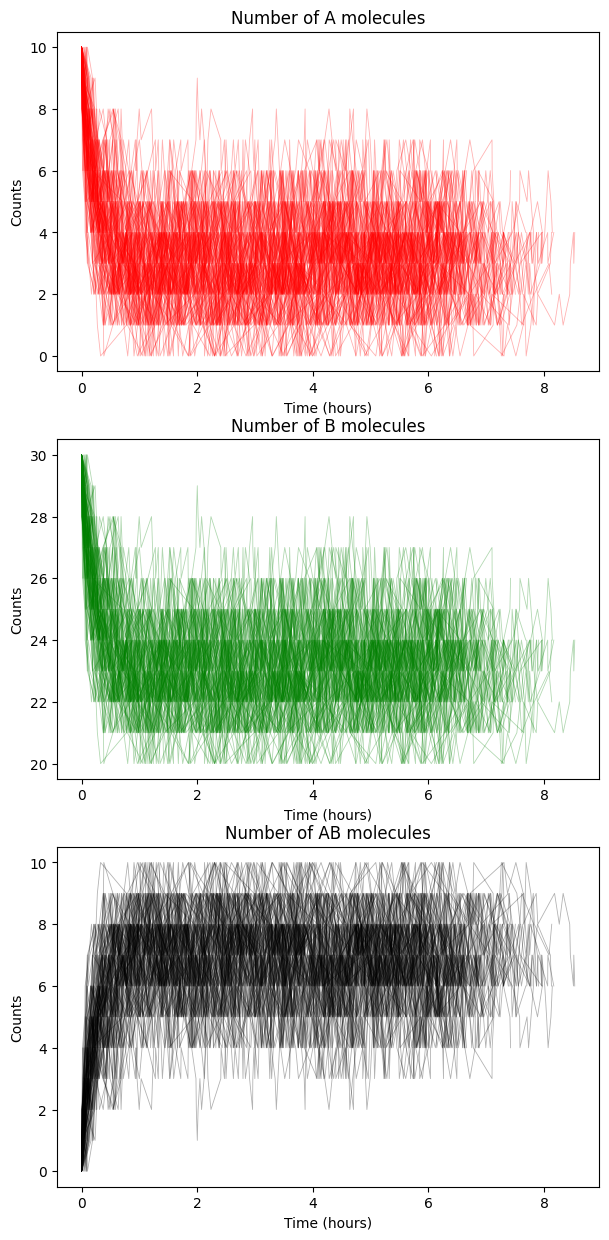

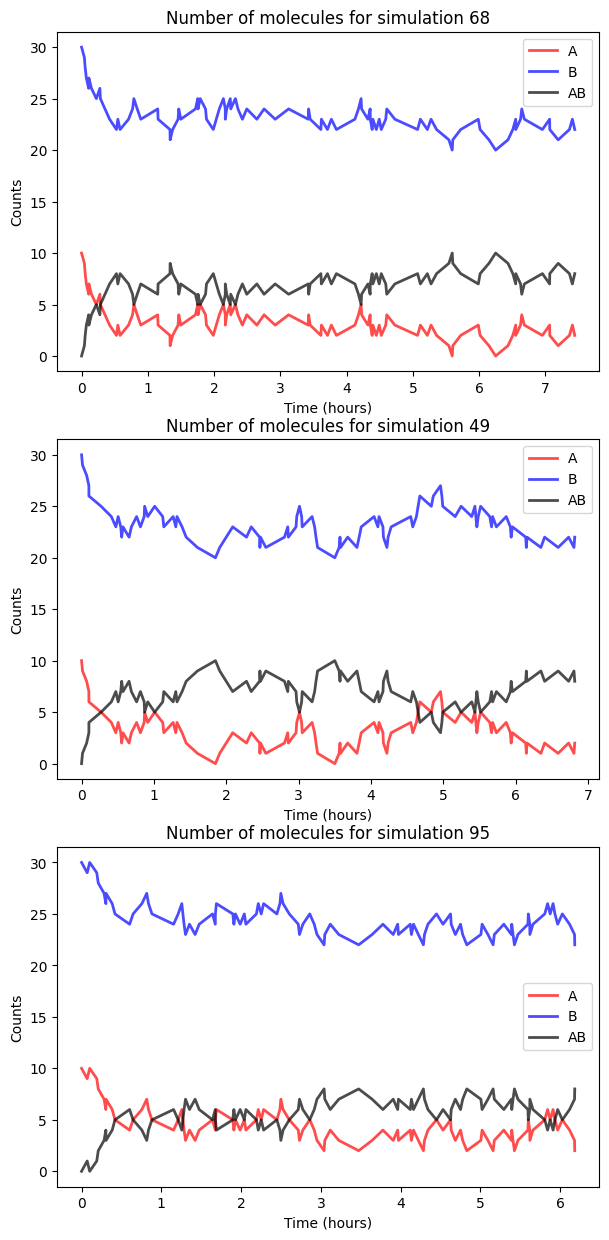

In [ ]:
# example_setting() #code below is integrated in the function
multi_N_A, multi_N_B, multi_N_AB, multi_T = multi_gillespi_simulation(
    N_A, N_B, N_AB, T, rf, rb, steps, trajectories
)

plot_simulation_results(multi_N_A, multi_N_B, multi_N_AB, multi_T)
plot_simulation_examples(multi_N_A, multi_N_B, multi_N_AB, multi_T)

### Project 

### Goal of this project
Write the code for a Gillespie simulation of the miRNA-TF-target protein FFL.

Variable definitions:
- $T$ is the TF mRNA
- $q$ is the transcription factor protein, 
- $s$ is the miRNA, 
- $r$ is the target mRNA, 
- $p$ is the target protein.
- $c$ is the complex of miRNA and mRNA.

Project version:
- $TF_{mRNA}$ transcription and decay: $\emptyset \xrightleftharpoons[\mu_T]{\alpha_T} TF_{mRNA}$
- $TF_{mRNA}$ translation and decay: $TF_{mRNA} \xrightarrow{\pi_T} TF_{protein} \xrightarrow{\mu_Q} \emptyset$
- miRNA production at rate $\alpha_S(q) = \alpha_S \frac{q}{q+K_S}$
- miRNA production and decay: $\emptyset \xrightleftharpoons[\mu_S]{\alpha_S(q)} miRNA$
- target mRNA transcription at rate $\alpha_R(Q) = \alpha_R \frac{q}{q+K_R}$
- Target mRNA transcription and decay: $\emptyset \xrightleftharpoons[\mu_R]{\alpha_R(q)} mRNA$
- Target protein translation and decay: $mRNA \xrightarrow{\pi_R} Protein \xrightarrow{\mu_R} \emptyset$
- miRNA-mediated mRNA degradation: 
  $miRNA + mRNA \xrightarrow{\beta} RNA_{complex}\xrightarrow{\mu_C} miRNA$

#### Define System

In [ ]:
# Import own packages
from Gillespie_Simulation import *
import numpy as np

# Plot inside Jupyter Notebook
%matplotlib inline

# auto reload imports after changes
%load_ext autoreload
%autoreload 2

In [2]:
# Set the random number seed for reproducibility
np.random.seed(1)

# load initial conditions
init_state_fname = "init_state.yaml"
init_state_path = construct_path(fname=init_state_fname)

# define the initial state of the system
start_state = State(init_state_path)
start_state.print()

------------------------
State(t=0)
-> TF_mRNA: 0
-> TF_protein: 0
-> miRNA: 0
-> mRNA: 0
-> protein: 0
-> complex: 0


In [40]:
start_state.print(full=True)

------------------------
State(t=0)
- time: 0
- TF_mRNA:
   - count: 0
   - translation_rate: 0.04
   - decay_rate: 0.006
   - transcription_rate: 0.06
   - transcription_rate_constant: True
- TF_protein:
   - count: 0
   - decay_rate: 0.002
- miRNA:
   - count: 0
   - transcription_rate: 0.5
   - decay_rate: 0.006
   - k: 200
- mRNA:
   - count: 0
   - translation_rate: 0.04
   - transcription_rate: 0.8
   - decay_rate: 0.006
   - k: 200
- protein:
   - count: 0
   - decay_rate: 0.002
- complex:
   - count: 0
   - molecules_per_complex: [1, 1]
   - formation_rate: 0.1
   - degradation_rate: 0.1


#### Run Simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


  0%|          | 0/3 [00:00<?, ?it/s]

Trajectory 1/3


 33%|███▎      | 1/3 [00:15<00:31, 15.54s/it]

Trajectory 2/3


 67%|██████▋   | 2/3 [00:42<00:22, 22.36s/it]

Trajectory 3/3


100%|██████████| 3/3 [00:57<00:00, 19.16s/it]


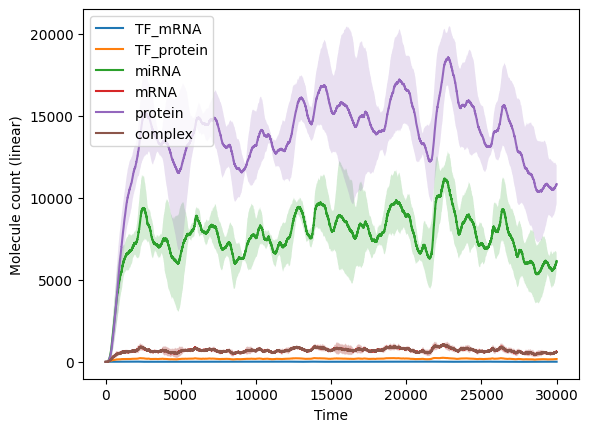

In [15]:
# Import own packages
from Gillespie_Simulation import *
import numpy as np

# Plot inside Jupyter Notebook
%matplotlib inline

# auto reload imports after changes
%load_ext autoreload
%autoreload 2

# Set the random number seed for reproducibility
np.random.seed(1)

# Main simulation
simulator = State_Machine()
results = simulator.run(steps=30000, trajectories=3)
simulator.plot()

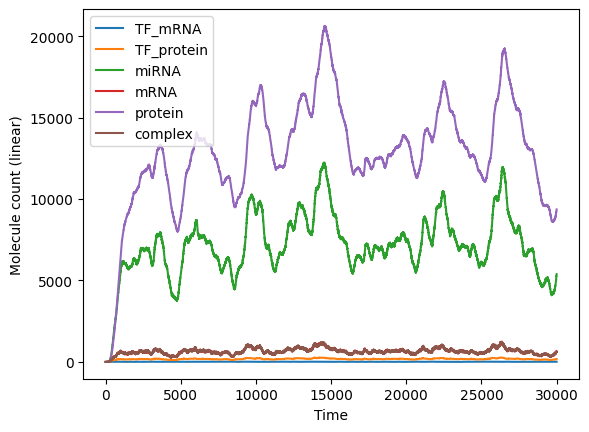

In [17]:
# plot single random example
simulator.plot(example=True)

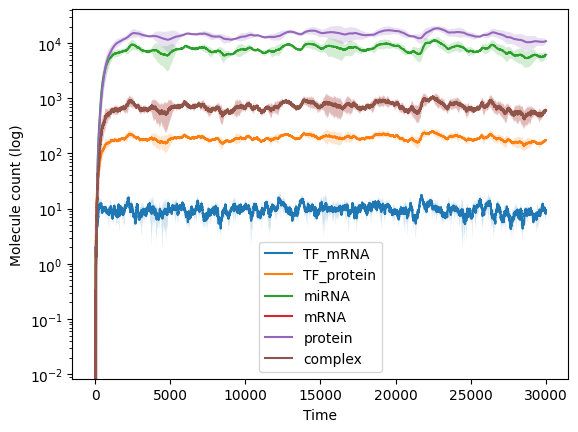

In [18]:
simulator.plot(scale="log")